# Network evolution

This notebook shows some network properties, and what are the mechanisms for network generation, that create networks similar to real-world networks, in terms of this properties.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import seaborn as sns
import numpy as np
import pandas as pd

# Degree distribution

First network property is a distribution of its node degree. Below, we find a drawing of Karate Club graph. It is a very small network, but still we can observe some interesting properties: the diamater is small (shortest paths are short), average clustering is pretty high. There are some nodes with high degree, but most of the nodes have very low degree.

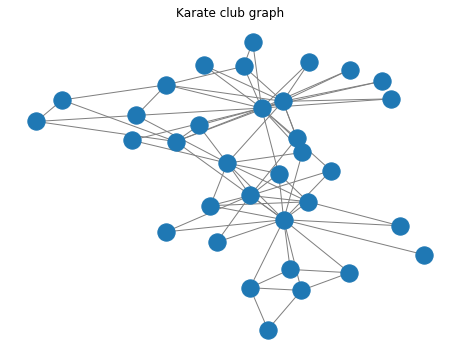

In [2]:
G = nx.karate_club_graph()

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, width=2)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Karate club graph')
plt.axis('off');

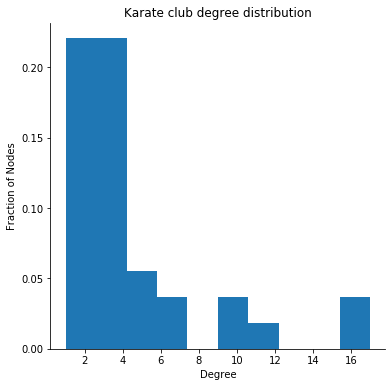

In [3]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G.degree()
plt.hist(dict(degrees).values(), density=True);
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Karate club degree distribution')
plt.show();

In [4]:
nx.average_clustering(G)

0.5706384782076823

In [5]:
nx.average_shortest_path_length(G)

2.408199643493761

In case of directed networks, we can draw its in- and out-degree distribution

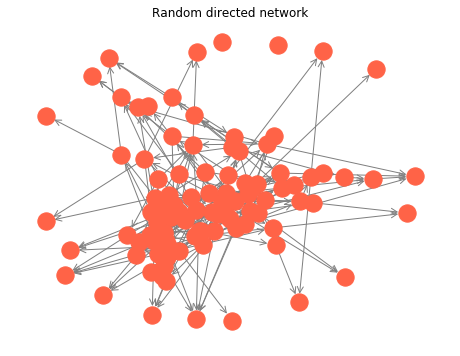

In [6]:
DG = nx.fast_gnp_random_graph(100, 0.02, directed=True)

pos = nx.layout.spring_layout(DG)
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(DG, pos, node_color='tomato')
edges = nx.draw_networkx_edges(DG, pos, edge_color='grey', arrowstyle='->', arrowsize=15)
plt.title('Random directed network')
plt.axis('off');

In-degree distribution of the network

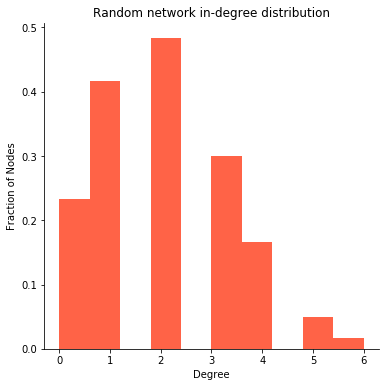

In [7]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = DG.in_degree()
plt.hist(dict(degrees).values(), density=True, color='tomato');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Random network in-degree distribution')
plt.show();

Out-degree of the network

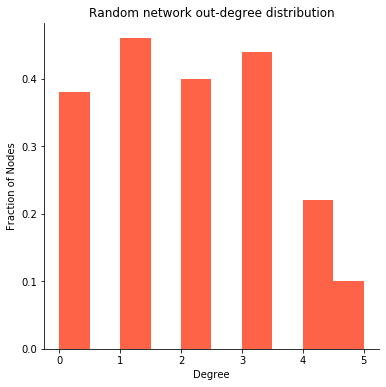

In [8]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = DG.out_degree()
plt.hist(dict(degrees).values(), density=True, color='tomato');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Random network out-degree distribution')
plt.show();

In [9]:
nx.average_clustering(DG.to_undirected())

0.03216666666666667

We can see that in case of a random network, degree distribution is very different from the one we've observed in a real network. Its average clustering is very low. 

It would be interesting to learn about mechanisms for network generation, that have mathematical properties similar to real-world networks.

# Preferential attachment

First mechanism for network generation is preferential attachment. It assigns new connection to nodes, that already have a high degree. This procedure results in networks in which most of the nodes have a low degree, but there are some nodes which high or very high degree - it is able to create networks with power law degree distribution, present in many natural or social phenomena. An example of such phenomena is frequency of word's apperance in a given language.

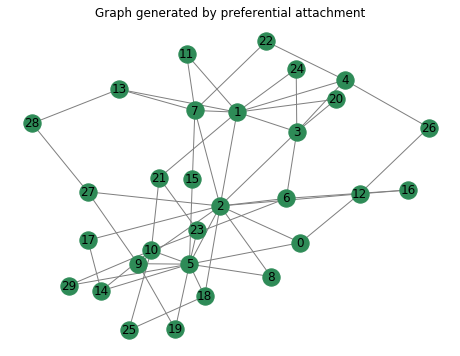

In [10]:
G_generated = nx.barabasi_albert_graph(30, 2)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_generated)
nx.draw_networkx_nodes(G_generated, pos, width=2, node_color='seagreen')
nx.draw_networkx_edges(G_generated, pos, edge_color='grey')
nx.draw_networkx_labels(G_generated, pos)
plt.title('Graph generated by preferential attachment')
plt.axis('off');

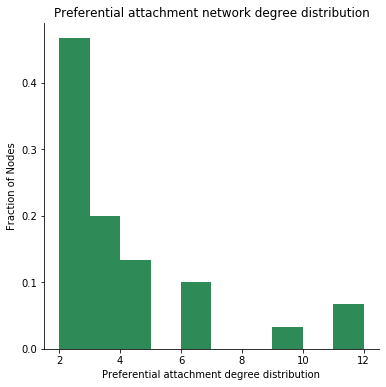

In [11]:
figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G_generated.degree()
plt.hist(dict(degrees).values(), density=True, color='seagreen');
plt.xlabel('Preferential attachment degree distribution')
plt.ylabel('Fraction of Nodes')
plt.title('Preferential attachment network degree distribution')
plt.show();

I've plotted a small network generated by preferential attachment. We can already sees that it differs from a random network. Its degree distribution recalls the distribution of real-world networks.

To furher examine properties of networks generated by preferential attachment mechanism, I will generate a bit bigger network - consisting of 1000 nodes. We can also specify a second parameter, that says, to how many nodes each new node should be connected.

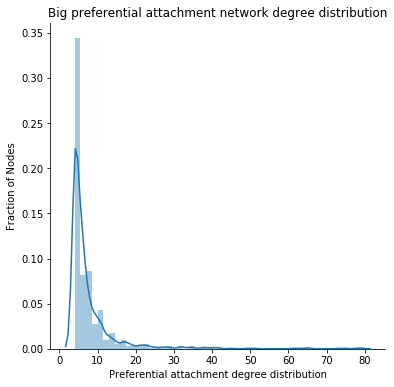

In [12]:
G_big_generated = nx.barabasi_albert_graph(1000, 4)

figure = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degrees = G_big_generated.degree()
sns.distplot(list(dict(degrees).values()));
plt.xlabel('Preferential attachment degree distribution')
plt.ylabel('Fraction of Nodes')
plt.title('Big preferential attachment network degree distribution')
plt.show();

In [13]:
nx.average_clustering(G_big_generated)

0.03318605871221057

In [14]:
nx.average_shortest_path_length(G_big_generated)

3.2064524524524525

We can see that degree distribution agrees with the one commonly observed in a real world networks! Average shortest path lenght is also similar. In contrast, average custering coefficient is much too small.

But what happens if we change the number of nodes, and number of nodes a new node connects to. Maybe we will be able to obtain networks even more similar to the real-world networks? Let's see!

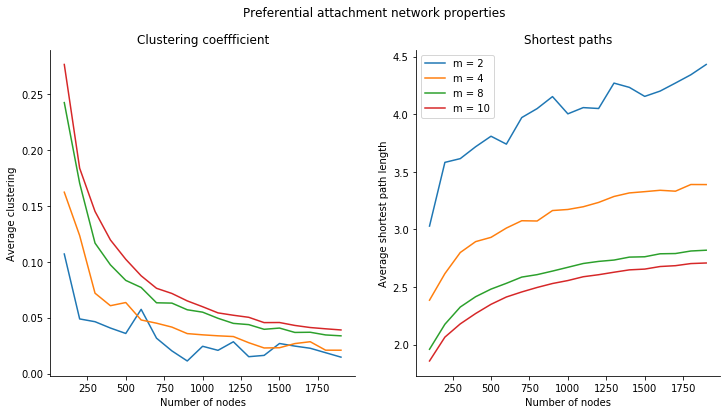

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

m_range = [2, 4, 8, 10]
n_range = range(100, 2000, 100)

for m in m_range:
    clust_values = np.zeros(shape=(len(n_range),))
    paths_values = np.zeros(shape=(len(n_range),))
    
    for idx, n in enumerate(n_range):
        G_big_generated = nx.barabasi_albert_graph(n, m)
        clust_values[idx] = nx.average_clustering(G_big_generated)
        paths_values[idx] = nx.average_shortest_path_length(G_big_generated)
    
    ax1.plot(n_range, clust_values, label=f'm = {m}')
    ax2.plot(n_range, paths_values, label=f'm = {m}')

    
plt.legend()
ax1.set_title('Clustering coeffficient')
ax1.set_xlabel('Number of nodes')
ax1.set_ylabel('Average clustering')

ax2.set_title('Shortest paths')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('Average shortest path length')
plt.suptitle('Preferential attachment network properties')
plt.show();

We can see that average clustering coefficient decreases rapidly with the number of node. Shortest path length grows with the number of nodes, what intuitivly makes sense. It is also logical, that average shortest path lenght is smaller, if a number of nodes a new node connects to is bigger - the number of connections is bigger, it is easier to traverse through the graph.

# Small world networks

Another networks generation mechanism is Watts–Strogatz model. It produces networks with small-world properties, that is short average path lengts and high clustering. It constructs the network in a following way:
- construct a regular ring lattice, a graph with N nodes, each connected to K neighbours
- rewire each ege with a probability p

Resulating networks have a distance L from two randomly chosen nodes growing logarithmicly with the number of nodes, that is: $ L \propto logN $
Small world networks are locally clustered, what also resembles real networks, but their degree distribution is very different.

Below, I plotted three different networks wiht different rewiring probabilities. High p results in a network very similar to random one.

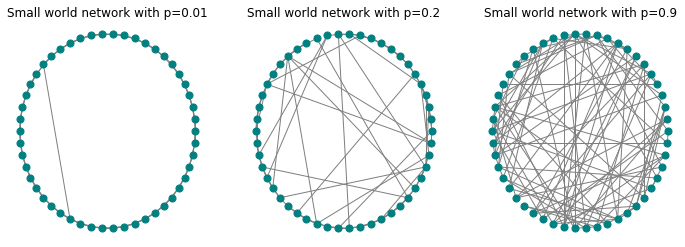

In [16]:
# Create three graphs with different rewiring probabilities
p1 = 0.01
p2 = 0.2
p3 = 0.9
G1 = nx.watts_strogatz_graph(50, 5, p1)
G2 = nx.watts_strogatz_graph(50, 5, p2)
G3 = nx.watts_strogatz_graph(50, 5, p3)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Draw first graph
plt.subplot(1, 3, 1)
pos = nx.circular_layout(G1)
nx.draw_networkx_nodes(G1, pos, width=2, node_color='teal', node_size=50)
nx.draw_networkx_edges(G1, pos, edge_color='grey')
plt.title(f'Small world network with p={p1}')
plt.axis('off');

# Draw second graph
plt.subplot(1, 3, 2)
pos = nx.circular_layout(G2)
nx.draw_networkx_nodes(G2, pos, width=2, node_color='teal', node_size=50)
nx.draw_networkx_edges(G2, pos, edge_color='grey')
plt.title(f'Small world network with p={p2}')
plt.axis('off');


# Draw third graph
plt.subplot(1, 3, 3)
pos = nx.circular_layout(G3)
nx.draw_networkx_nodes(G3, pos, width=2, node_color='teal', node_size=50)
nx.draw_networkx_edges(G3, pos, edge_color='grey')

plt.title(f'Small world network with p={p3}')
plt.axis('off');

I've also plotted degree distribution of this three networks. For smaller p, the degree is similar to initial number of neigbours. Big p has a random degree distribution.

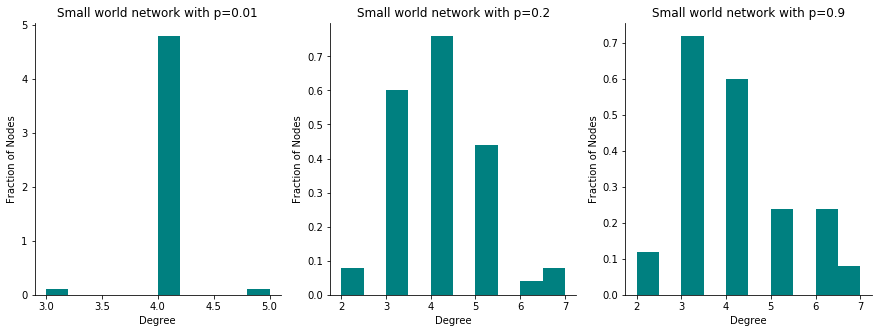

In [17]:
fig = plt.figure(figsize=(15, 5))

# Draw first distribution
ax = plt.subplot(1, 3, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
degrees = G1.degree()
plt.hist(dict(degrees).values(), density=True, color='teal');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title(f'Small world network with p={p1}');

# Draw second distribution
ax = plt.subplot(1, 3, 2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
degrees = G2.degree()
plt.hist(dict(degrees).values(), density=True, color='teal');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title(f'Small world network with p={p2}');

# Draw third distibution
ax = plt.subplot(1, 3, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
degrees = G3.degree()
plt.hist(dict(degrees).values(), density=True, color='teal');
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title(f'Small world network with p={p3}');

Let's see how small networks properties depend on number of initial neigbours and rewiring properties. 

Clustering coefficient decreases when rewiring probability grows. For small p it is very similar to real world networks, for higher p values, it gets much smaller, resembling a random network.

Average shortest path lengths decrease rapidly - the more rewiring the easier to find a short path between pairs of nodes. For p bigger than 0.4 the distances don't change much.

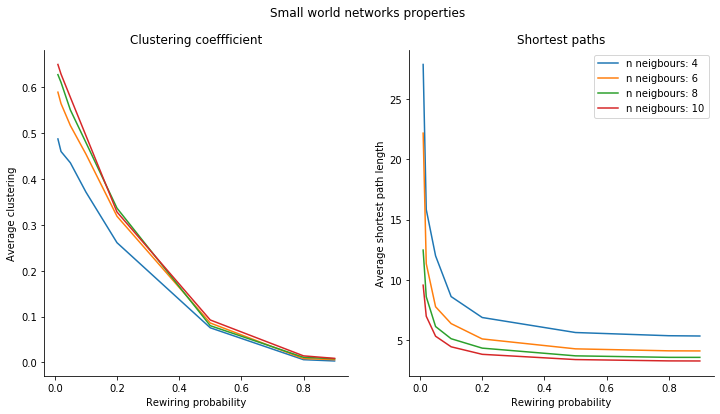

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

k_range = [4, 6, 8, 10]
p_range = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9]

for k in k_range:
    clust_values = np.zeros(shape=(len(p_range),))
    paths_values = np.zeros(shape=(len(p_range),))
    
    for idx, p in enumerate(p_range):
        G_big_generated = nx.watts_strogatz_graph(1000, k, p)
        clust_values[idx] = nx.average_clustering(G_big_generated)
        paths_values[idx] = nx.average_shortest_path_length(G_big_generated)
    
    ax1.plot(p_range, clust_values, label=f'n neigbours: {k}')
    ax2.plot(p_range, paths_values, label=f'n neigbours: {k}')

    
plt.legend()
ax1.set_title('Clustering coeffficient')
ax1.set_xlabel('Rewiring probability')
ax1.set_ylabel('Average clustering')

ax2.set_title('Shortest paths')
ax2.set_xlabel('Rewiring probability')
ax2.set_ylabel('Average shortest path length')
plt.suptitle('Small world networks properties')
plt.show();

# Link prediction

Now, after learning about some network generation mechanisms, I will take a look at link prediction. It is a task of assesing what new connections are likely to be created in existing network. There is quite a few approaches to make this predictions.

First, I will create a small graph by hand for ilustration purposes.

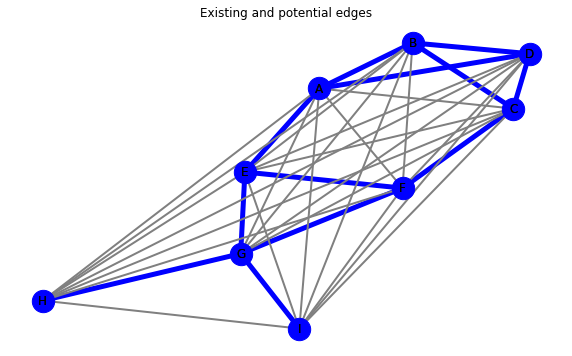

In [19]:
G = nx.Graph()
G.add_edge('A', 'B', label='actual')
G.add_edge('A', 'D', label='actual')
G.add_edge('B', 'D', label='actual')
G.add_edge('B', 'C', label='actual')
G.add_edge('C', 'D', label='actual')
G.add_edge('A', 'E', label='actual')
G.add_edge('C', 'F', label='actual')
G.add_edge('E', 'F', label='actual')
G.add_edge('E', 'G', label='actual')
G.add_edge('G', 'F', label='actual')
G.add_edge('G', 'H', label='actual')
G.add_edge('G', 'I', label='actual')

actual_edges = [(v, w) for v, w in G.edges if G.edges[v, w]['label'] == 'actual']
pos = nx.spring_layout(G)

G_initial = G.edge_subgraph(actual_edges)

# Add all potential, not yet formed edges
missing_edges = list(nx.non_edges(G))
for edge in missing_edges:
    G.add_edge(*edge, label='missing')
    
plt.figure(figsize=(10, 6))

# Draw actual graph
nx.draw_networkx(
    G,
    pos=pos,
    node_size=500,
    edgelist=actual_edges,
    node_color='blue',
    edge_color='blue',
    width=5)

# Draw potential edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=missing_edges,
    edge_color='grey',
    width=2)

plt.title('Existing and potential edges')
plt.axis('off');

The simplest method to asses which nodes will become connected is to measure the number of common neighbours they have. The idea behind this approach is quite intuitive - a new connection is likely to be created in already well connected subgraph.

I will create a DataFrame with rows representing potential cotention. Columns represent a score for the connection. Sometimes it is a probability, but it can also be represented as a number - the higher, the more likely a connection is to be created.

In [20]:
def n_common_neighbours(G, u, v):
    """Find number of neighbours two nodes share."""
    n = len(list(nx.common_neighbors(G, u, v)))
    return u, v, n

# Create DataFrame
df = pd.DataFrame(index=nx.non_edges(G_initial))

# Iterate over all pairs of nodes that are not yet connected
df['common_neighbours'] = [n_common_neighbours(G_initial, u, v) for u, v in nx.non_edges(G_initial)]
df['common_neighbours'] = df['common_neighbours'].apply(lambda x: x[2])

# Print a DataFrame sort pairs by the score
df.sort_values(by='common_neighbours', ascending=False)

,common_neighbours
"(A, C)",2
"(A, F)",1
"(H, I)",1
"(H, E)",1
"(F, I)",1
"(F, H)",1
"(C, G)",1
"(C, E)",1
"(B, F)",1
"(A, G)",1


Second method is to use Jaccard coefficient of each pair's neigbours. 

In [21]:
df['jaccard_coeff']  = [(u, v, score) for u, v, score in nx.jaccard_coefficient(G_initial)]
df['jaccard_coeff'] = df['jaccard_coeff'].apply(lambda x: round(x[2], 3))
df.sort_values(by='jaccard_coeff', ascending=False)

,common_neighbours,jaccard_coeff
"(H, I)",1,1.000
"(A, C)",2,0.500
"(E, I)",1,0.333
"(H, E)",1,0.333
"(F, I)",1,0.333
"(F, H)",1,0.333
"(C, E)",1,0.200
"(B, F)",1,0.200
"(A, F)",1,0.200
"(D, E)",1,0.200


Another method involves measuring so called resource allocation. For each pair of nodes, we measure a fraction of "resource", that one node can send to the other node. Initial value of resource is one, this value is then divided by the degree of intermediate node of a pair.

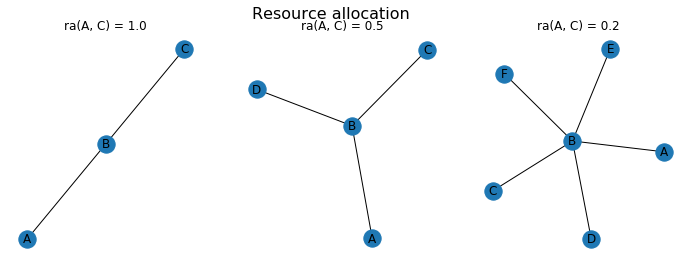

In [22]:
G_resource1 = nx.Graph()
G_resource1.add_edge('A', 'B')
G_resource1.add_edge('B', 'C')

G_resource2 = nx.Graph()
G_resource2.add_edge('A', 'B')
G_resource2.add_edge('B', 'C')
G_resource2.add_edge('B', 'D')

G_resource3 = nx.Graph()
G_resource3.add_edge('A', 'B')
G_resource3.add_edge('B', 'C')
G_resource3.add_edge('B', 'D')
G_resource3.add_edge('B', 'E')
G_resource3.add_edge('B', 'F')

fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
pos = nx.spring_layout(G_resource1)
nx.draw_networkx_nodes(G_resource1, pos=pos)
nx.draw_networkx_edges(G_resource1, pos=pos)
nx.draw_networkx_labels(G_resource1, pos=pos)
plt.title('ra(A, C) = 1.0')
plt.axis('off');

plt.subplot(1, 3, 2)
pos = nx.spring_layout(G_resource2)
nx.draw_networkx_nodes(G_resource2, pos=pos)
nx.draw_networkx_edges(G_resource2, pos=pos)
nx.draw_networkx_labels(G_resource2, pos=pos)
plt.title('ra(A, C) = 0.5')
plt.axis('off');

plt.subplot(1, 3, 3)
pos = nx.spring_layout(G_resource3)
nx.draw_networkx_nodes(G_resource3, pos=pos)
nx.draw_networkx_edges(G_resource3, pos=pos)
nx.draw_networkx_labels(G_resource3, pos=pos)
plt.title('ra(A, C) = 0.2')
plt.axis('off');

plt.suptitle('Resource allocation', fontsize=16);

In [23]:
df['resource_allocation']  = [(u, v, score) for u, v, score in nx.resource_allocation_index(G_initial)]
df['resource_allocation'] = df['resource_allocation'].apply(lambda x: round(x[2], 3))
df.sort_values(by='resource_allocation', ascending=False)

,common_neighbours,jaccard_coeff,resource_allocation
"(A, C)",2,0.500,0.667
"(A, F)",1,0.200,0.333
"(C, E)",1,0.200,0.333
"(B, E)",1,0.200,0.333
"(D, F)",1,0.200,0.333
"(D, E)",1,0.200,0.333
"(C, G)",1,0.167,0.333
"(A, G)",1,0.167,0.333
"(B, F)",1,0.200,0.333
"(H, I)",1,1.000,0.250


Adamic Adar index is a very similar measure to resource allocation index, with the difference, that instead of dividing by the degree of intermediate node, we devide by log of the degree

In [24]:
df['adamic_adar_index']  = [(u, v, score) for u, v, score in nx.adamic_adar_index(G_initial)]
df['adamic_adar_index'] = df['adamic_adar_index'].apply(lambda x: round(x[2], 3))
df.sort_values(by='adamic_adar_index', ascending=False)

,common_neighbours,jaccard_coeff,resource_allocation,adamic_adar_index
"(A, C)",2,0.500,0.667,1.820
"(A, F)",1,0.200,0.333,0.910
"(C, E)",1,0.200,0.333,0.910
"(B, E)",1,0.200,0.333,0.910
"(D, F)",1,0.200,0.333,0.910
"(D, E)",1,0.200,0.333,0.910
"(C, G)",1,0.167,0.333,0.910
"(A, G)",1,0.167,0.333,0.910
"(B, F)",1,0.200,0.333,0.910
"(H, I)",1,1.000,0.250,0.721


Preferential attachment scores is the product of two nodes' degree

In [25]:
df['preferential_attachment']  = [(u, v, score) for u, v, score in nx.preferential_attachment(G_initial)]
df['preferential_attachment'] = df['preferential_attachment'].apply(lambda x: round(x[2], 3))
df.sort_values(by='preferential_attachment', ascending=False)

,common_neighbours,jaccard_coeff,resource_allocation,adamic_adar_index,preferential_attachment
"(B, G)",0,0.000,0.000,0.000,12
"(C, G)",1,0.167,0.333,0.910,12
"(D, G)",0,0.000,0.000,0.000,12
"(A, G)",1,0.167,0.333,0.910,12
"(D, E)",1,0.200,0.333,0.910,9
"(C, E)",1,0.200,0.333,0.910,9
"(B, F)",1,0.200,0.333,0.910,9
"(A, C)",2,0.500,0.667,1.820,9
"(A, F)",1,0.200,0.333,0.910,9
"(D, F)",1,0.200,0.333,0.910,9


In [26]:
G_new = nx.Graph()
G_new.add_edges_from(df.index)

In [27]:
for i, (v, w) in enumerate(df.index):
    G_new.edges()[v, w]['jaccard_coeff'] = df.iloc[i]['jaccard_coeff']
    G_new.edges()[v, w]['resource_allocation'] = df.iloc[i]['resource_allocation']
    G_new.edges()[v, w]['adamic_adar_index'] = df.iloc[i]['adamic_adar_index']
    G_new.edges()[v, w]['preferential_attachment'] = df.iloc[i]['preferential_attachment']

To help us understand how different scores are assigned to potential connection, I will add them to the graph, and plot them with darker colors representing more likely future connections.

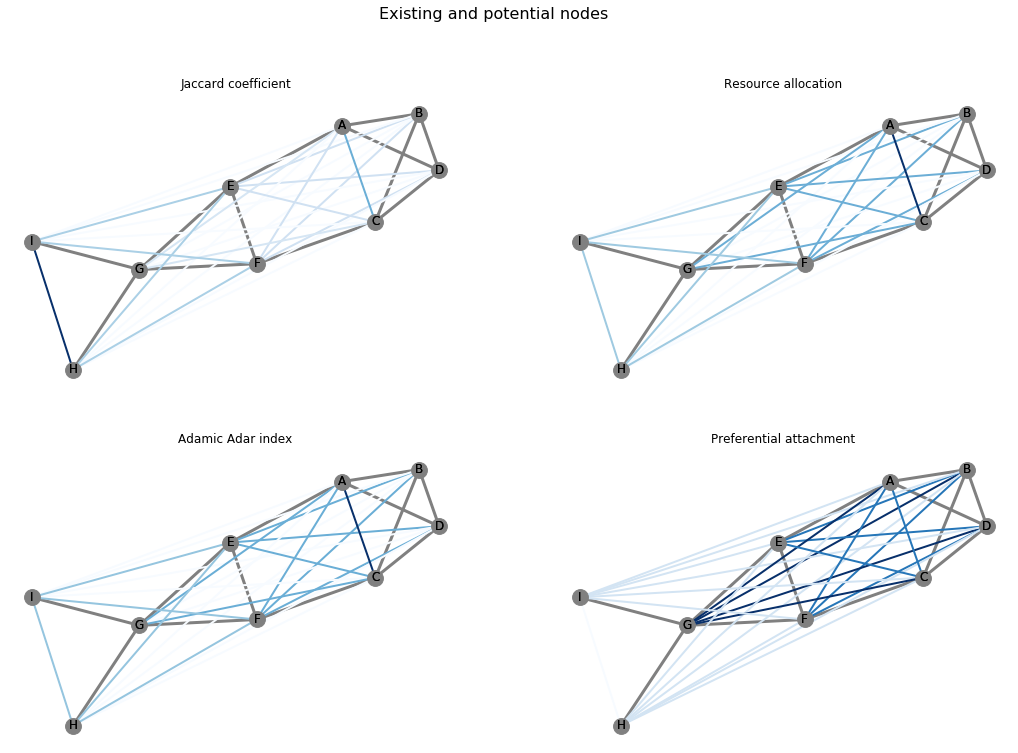

In [31]:
def draw_potential_edges(G, G_new, df, column_name):
    # Draw actual graph
    nx.draw_networkx(
        G,
        pos=pos,
        node_size=250,
        edgelist=actual_edges,
        node_color='grey',
        edge_color='grey',
        width=3)
    
    # Draw potential edges
    nx.draw_networkx(
        G_new,
        pos=pos,
        node_size=0,
        edgelist=list(df.index),
        edge_color=df[column_name] / np.max(df[column_name]),
        edge_cmap=plt.cm.Blues,
        width=2)


fig = plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G_initial)
plt.subplot(2, 2, 1)
draw_potential_edges(G_initial, G_new, df, 'jaccard_coeff')
plt.title('Jaccard coefficient')
plt.axis('off');

plt.subplot(2, 2, 2)
draw_potential_edges(G, G_new, df, 'resource_allocation')
plt.title('Resource allocation')
plt.axis('off');

plt.subplot(2, 2, 3)
draw_potential_edges(G_initial, G_new, df, 'adamic_adar_index')
plt.title('Adamic Adar index')
plt.axis('off');

plt.subplot(2, 2, 4)
draw_potential_edges(G_initial, G_new, df, 'preferential_attachment')
plt.title('Preferential attachment')
plt.axis('off');

plt.suptitle('Existing and potential nodes', fontsize=16);

# Community structure - aware link prediction

Following two measures not only take into account the degree of the nodes, but also a community structure of the network. Pairs of nodes who belong to the same community and have many common neighbours in the same community are likely to form an edge.

The first one is called common neighbours Soundarajan-Hopcroft score. It's like common neighbours described above, with a bonus if a certain pair belongs to the same community.

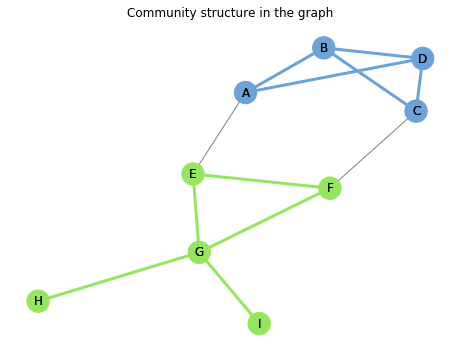

In [32]:
G = G_initial
G.nodes['A']['community'] = 1
G.nodes['B']['community'] = 1
G.nodes['C']['community'] = 1
G.nodes['D']['community'] = 1
G.nodes['E']['community'] = 2
G.nodes['F']['community'] = 2
G.nodes['G']['community'] = 2
G.nodes['H']['community'] = 2
G.nodes['I']['community'] = 2

def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)


def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0


# Set edge communities
set_edge_community(G)
colors = [get_color(G.nodes[n]['community']) for n in G.nodes()]
pos = nx.spring_layout(G)

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

plt.figure(figsize=(8, 6))

# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color='grey')
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=500,
    node_color=colors,
    edgelist=internal,
    edge_color=internal_color,
    width=3)

plt.title('Community structure in the graph')
plt.axis('off');

In [33]:
df = pd.DataFrame(index=nx.non_edges(G_initial))
df['cn_soundarajan_hopcroft']  = [(u, v, score) for u, v, score in nx.cn_soundarajan_hopcroft(G_initial)]
df['cn_soundarajan_hopcroft'] = df['cn_soundarajan_hopcroft'].apply(lambda x: round(x[2], 3))
df.sort_values(by='cn_soundarajan_hopcroft', ascending=False)

,cn_soundarajan_hopcroft
"(A, C)",4
"(E, I)",2
"(H, I)",2
"(H, E)",2
"(F, I)",2
"(F, H)",2
"(C, G)",1
"(C, E)",1
"(B, F)",1
"(A, G)",1


The second is similar to resource allocation index, taking into account community structure - again, we have a bonus for a pair from the same community.

In [34]:
df['ra_soundarajan_hopcroft']  = [(u, v, score) for u, v, score in nx.ra_index_soundarajan_hopcroft(G_initial)]
df['ra_soundarajan_hopcroft'] = df['ra_soundarajan_hopcroft'].apply(lambda x: round(x[2], 3))
df.sort_values(by='ra_soundarajan_hopcroft', ascending=False)

,cn_soundarajan_hopcroft,ra_soundarajan_hopcroft
"(A, C)",4,0.667
"(E, I)",2,0.250
"(H, I)",2,0.250
"(H, E)",2,0.250
"(F, I)",2,0.250
"(F, H)",2,0.250
"(A, H)",0,0.000
"(C, G)",1,0.000
"(C, I)",0,0.000
"(C, E)",1,0.000


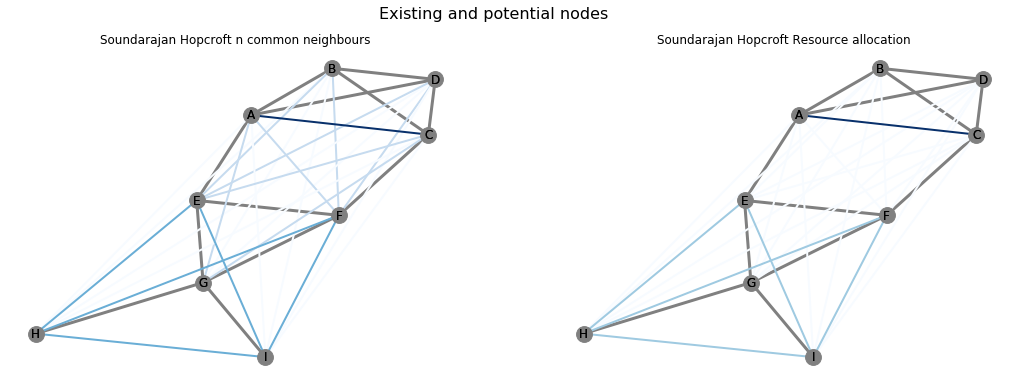

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plt.subplot(1, 2, 1)
draw_potential_edges(G, G_new, df, 'cn_soundarajan_hopcroft')
plt.title('Soundarajan Hopcroft n common neighbours')
plt.axis('off');

plt.subplot(1, 2, 2)
draw_potential_edges(G, G_new, df, 'ra_soundarajan_hopcroft')
plt.title('Soundarajan Hopcroft Resource allocation')
plt.axis('off');

plt.suptitle('Existing and potential nodes', fontsize=16);